
# Rentals analysis

## Data munging

In [3]:
%matplotlib inline
from pandas import *

data = read_json("../rentals/rentals.json")
data.head()

,allowances,bond_amount,date_available,description,keywords,nbn,num_bathrooms,num_bedrooms,num_carspaces,other_features,postcode,property_num,property_type,rent_amount,street_address,suburb,url
0,NaN,[$737],[Available Now],UniLodge on A'Beckett is a student accommodati...,NaN,n,[7],[],[$737],NaN,NaN,417284042,[Apartment],$170 per week,[Twin Share Room/106-116 A'Beckett Street Melb...,NaN,http://www.realestate.com.au/property-apartmen...
1,NaN,[$824],[Available Now],ARRANGE AN INSPECTION TIME ONLINE - DETAILS BE...,NaN,fixed,[1],[],[$824],NaN,NaN,417060338,[Studio],$190 per week,[16/677 Park Street Brunswick],NaN,http://www.realestate.com.au/property-studio-v...
2,NaN,[],[Available Now],Please note you must register to attend an ins...,NaN,fixed,[1],[1],0,NaN,NaN,410376323,[Unit],$210 per week,[3/34 Pearson Street Brunswick],NaN,http://www.realestate.com.au/property-unit-vic...
3,NaN,[$913],[Mon 04-Jan-16],One bedroom apartment featuring:\n- Wall to wa...,NaN,n,[1],[1],[$913],NaN,NaN,417306710,[Apartment],$220 per week,[10/49 Farnham Street Flemington],NaN,http://www.realestate.com.au/property-apartmen...
4,NaN,[$847],[Available Now],Shared Accommodation ! One big bright room is ...,NaN,n,[3],[1],[$847],NaN,NaN,417402754,[House],$195 per week,[5/59 Waltham St Flemington],NaN,http://www.realestate.com.au/property-house-vi...


In [4]:
data['rent_amount'].head()

0    $170 per week
1    $190 per week
2    $210 per week
3    $220 per week
4    $195 per week
Name: rent_amount, dtype: object

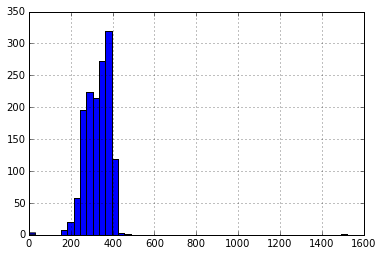

In [11]:
import re


"""
Extract the weekly rental amount in dollars
from the free text rental_amount field
"""
def extract_rent(s):
    return re.match(r"\D*(\d+).*", s).group(1)

data['rent'] = data['rent_amount'].map(extract_rent)
## integer value
data['rent'] = data['rent'].astype('int64')
## exploratory plot of rent amounts (histogram)
data['rent'].hist(bins=50)

In [6]:
street_types = ['street','road','st','rd','parade','pde','place','pl','lane','way','esplanade', 'esplanade east','avenue','ave']
def contains_known_street_type(s): pass

"""
Clean up the street address field
Normalise street names and make it conform 
to postal address if possible
"""
def tidy_street_address(s):
    s = s[0] # lose the array format
    pattern = r"\D*(\d.*)" # starts with numeral
    try: s = re.match(r"\D*(\d+.*)",s).group(1)
    except: pass # doesn't conform so keep it as it is
    return s

street = data['street_address'].map(tidy_street_address)
street.head()

0    106-116 A'Beckett Street Melbourne
1          16/677 Park Street Brunswick
2         3/34 Pearson Street Brunswick
3       10/49 Farnham Street Flemington
4            5/59 Waltham St Flemington
Name: street_address, dtype: object

In [7]:
## we can pull the suburb name out of the url format, e.g.
data['url'].irow(0)

'http://www.realestate.com.au/property-apartment-vic-melbourne-417284042'

In [8]:
data['url'].irow(1437)

'http://www.realestate.com.au/property-unit-vic-brunswick+west-412783479'

In [9]:
"""
Pull the suburb name out of the property details url
"""
def get_suburb(url):
    return url.split('-')[3]

data['suburb'] = data['url'].map(get_suburb)

In [10]:
## get list of suburbs 
g = data.groupby("suburb")
g.agg("count")['url']

suburb
abbotsford          28
albert+park          5
ascot+vale          37
brunswick          111
brunswick+east      46
brunswick+west      65
carlton            239
carlton+north        5
clifton+hill         7
coburg              38
collingwood         54
docklands           12
east+melbourne       7
fitzroy             14
fitzroy+north       20
flemington          31
footscray          122
kensington          27
maribyrnong         65
melbourne          229
middle+park          6
moonee+ponds        31
north+melbourne     76
northcote           44
parkville           20
port+melbourne       8
seddon              10
south+melbourne     15
southbank           34
travancore          18
west+melbourne      14
Name: url, dtype: int64